In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [2]:
d = loadmat('dataset/resultados_w1000pts.mat')
ptrafo1 = pd.DataFrame(d['Ptrafo1'].transpose().flatten(), columns = ['Ptrafo1'])
ptrafo2 = pd.DataFrame(d['Ptrafo2'].transpose().flatten(), columns = ['Ptrafo2'])


In [3]:
fv = loadmat('dataset/FVcurves1000pts.mat')
fv_12 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_12'])
fv_18 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_18'])
fv_25 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_25'])
fv_29 = (1/47) * pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_29'])
fv_32 = (1/42) * pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_32'])

In [4]:
vref1 = np.zeros([144, 1000])
vref2 = np.zeros([144, 1000])
a = 0
b = 25
for i in range(144):
  for j in range(len(d['Tensao'][0])):
    vref1[i][j] = d['Tensao'][a][j]
    vref2[i][j] = d['Tensao'][b][j]
  a = a + 42
  b = b + 42

vref1 = pd.DataFrame(vref1.transpose().flatten(), columns = ['Vref1'])
vref2 = pd.DataFrame(vref2.transpose().flatten(), columns = ['Vref2'])

In [5]:
cargaP = np.zeros([42, 1000, 144])
cargaQ = np.zeros([42, 1000, 144])
p = d['CargaP'].transpose()
q = d['CargaP'].transpose()

for i in range(42):
  for j in range(1000):
    a = i
    for k in range(144):
      cargaP[i][j][k] = p[j][a]
      cargaQ[i][j][k] = q[j][a]
      a = a + 42

cargaP = pd.DataFrame(cargaP.reshape(42,144000).transpose())
cargaP.columns = [f'P{col_name}' for col_name in cargaP.columns]
cargaP = cargaP.drop(['P0','P25'], axis=1)

cargaQ = pd.DataFrame(cargaQ.reshape(42,144000).transpose())
cargaQ.columns = [f'Q{col_name}' for col_name in cargaQ.columns]
cargaQ = cargaQ.drop(['Q0','Q25'], axis=1)

X = pd.concat([ptrafo1, ptrafo2, cargaP, cargaQ], axis=1)
X2 = X.iloc[:1440,:]
X = X.iloc[1440:,:]
X

,Ptrafo1,Ptrafo2,P1,P2,P3,P4,P5,P6,P7,P8,...,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41
1440,0.337678,0.093012,0.009481,0.009348,0.010640,0.005741,0.005507,0.020521,0.020264,0.005551,...,0.000255,0.000253,0.006299,0.005716,0.005786,0.012480,0.021099,0.013912,0.021721,0.005749
1441,0.305996,0.084692,0.009507,0.008017,0.010989,0.005431,0.005488,0.018590,0.018987,0.005639,...,0.000185,0.000220,0.005627,0.005359,0.005044,0.010697,0.019658,0.013124,0.019688,0.005284
1442,0.291301,0.079540,0.008719,0.007536,0.010365,0.005265,0.005271,0.019339,0.018926,0.005178,...,0.000206,0.000228,0.005530,0.005308,0.005564,0.010815,0.017404,0.012537,0.017385,0.004822
1443,0.277902,0.077530,0.009021,0.007408,0.010420,0.004760,0.004796,0.017365,0.016025,0.005020,...,0.000178,0.000210,0.004860,0.004929,0.005253,0.010727,0.017573,0.013319,0.015857,0.004839
1444,0.279065,0.078561,0.008104,0.007931,0.010299,0.004801,0.004836,0.016200,0.016499,0.004801,...,0.000185,0.000211,0.004941,0.005104,0.004923,0.010776,0.017839,0.012315,0.017587,0.004897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,0.857367,0.235687,0.025086,0.023784,0.028559,0.014306,0.014914,0.050059,0.051772,0.015628,...,0.000572,0.000698,0.015604,0.015474,0.017490,0.028037,0.049220,0.034343,0.057983,0.015990
143996,0.740003,0.201916,0.020649,0.020129,0.028740,0.013905,0.012886,0.046503,0.046473,0.012015,...,0.000447,0.000611,0.013078,0.012686,0.012914,0.025388,0.043782,0.033284,0.046765,0.012852
143997,0.802869,0.220284,0.023419,0.021639,0.027228,0.013467,0.015262,0.050713,0.050593,0.014626,...,0.000494,0.000631,0.013512,0.013954,0.014343,0.027805,0.048484,0.037782,0.048746,0.014248
143998,0.549499,0.155256,0.016391,0.013969,0.019271,0.010247,0.009601,0.034645,0.032181,0.009958,...,0.000389,0.000410,0.009907,0.010678,0.008767,0.017730,0.036404,0.023869,0.037465,0.009715


In [6]:
tensao = np.zeros([42, 1000, 144])
t = d['Tensao'].transpose()

for i in range(42):
  for j in range(1000):
    a = i
    for k in range(144):
      tensao[i][j][k] = t[j][a]
      a = a + 42

tensao = pd.DataFrame(tensao.reshape(42,144000).transpose())
Y = tensao.drop([0,25], axis=1)
Y2 = Y.iloc[:1440,:]
Y = Y.iloc[1440:,:]
Y


,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
1440,1.049755,1.048616,1.047947,1.047283,1.045627,1.045314,1.044880,1.044323,1.043802,1.043725,...,1.046349,1.046316,1.045454,1.045224,1.044192,1.043449,1.043130,1.042769,1.042688,1.042664
1441,1.049777,1.048740,1.048125,1.047518,1.046005,1.045721,1.045326,1.044824,1.044359,1.044291,...,1.046814,1.046785,1.045846,1.045636,1.044691,1.044009,1.043713,1.043382,1.043307,1.043285
1442,1.049789,1.048807,1.048222,1.047644,1.046209,1.045932,1.045553,1.045077,1.044635,1.044570,...,1.046853,1.046822,1.046062,1.045868,1.045000,1.044380,1.044114,1.043812,1.043746,1.043726
1443,1.049798,1.048855,1.048297,1.047747,1.046378,1.046122,1.045769,1.045311,1.044888,1.044826,...,1.047060,1.047032,1.046233,1.046041,1.045180,1.044563,1.044299,1.044003,1.043941,1.043921
1444,1.049797,1.048853,1.048296,1.047747,1.046377,1.046126,1.045775,1.045324,1.044907,1.044844,...,1.046995,1.046967,1.046231,1.046036,1.045164,1.044536,1.044267,1.043964,1.043897,1.043877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,1.049380,1.046493,1.044786,1.043096,1.038897,1.038091,1.036963,1.035509,1.034161,1.033960,...,1.040947,1.040853,1.038462,1.037885,1.035321,1.033494,1.032695,1.031740,1.031518,1.031450
143996,1.049464,1.046952,1.045459,1.043993,1.040356,1.039656,1.038691,1.037464,1.036318,1.036148,...,1.042061,1.041979,1.039981,1.039483,1.037257,1.035658,1.034962,1.034147,1.033968,1.033914
143997,1.049418,1.046700,1.045085,1.043486,1.039506,1.038744,1.037694,1.036361,1.035128,1.034946,...,1.041565,1.041480,1.039095,1.038548,1.036102,1.034345,1.033582,1.032695,1.032506,1.032446
143998,1.049599,1.047733,1.046619,1.045518,1.042773,1.042266,1.041571,1.040676,1.039849,1.039726,...,1.044188,1.044133,1.042481,1.042093,1.040354,1.039097,1.038544,1.037923,1.037782,1.037741


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(99792, 82)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()

model.add(Dense(82,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40))

model.compile(optimizer='adam',loss='mae')

### Training

In [11]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=50)

Epoch 1/50
780/780 [==============================] - 5s 5ms/step - loss: 0.0851 - val_loss: 0.0072
Epoch 2/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 3/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 4/50
780/780 [==============================] - 1s 1ms/step - loss: 0.0052 - val_loss: 0.0115
Epoch 5/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 6/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 7/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0076
Epoch 8/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0043 - val_loss: 0.0168
Epoch 9/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 10/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0021

In [12]:
mae = model.evaluate(X_test, y_test, verbose=0)
print('>%.3f' % mae)

>0.002


### Losses

<AxesSubplot:>

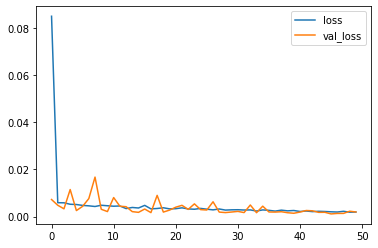

In [13]:
losses = pd.DataFrame(history.history)
losses.plot()

### Evaluation on Test Data

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
X2

,Ptrafo1,Ptrafo2,P1,P2,P3,P4,P5,P6,P7,P8,...,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41
0,0.334064,0.094185,0.009734,0.009834,0.012679,0.006414,0.005711,0.019901,0.020760,0.005586,...,0.000216,0.000265,0.005832,0.005882,0.006341,0.011216,0.020954,0.015683,0.021967,0.006054
1,0.294347,0.080567,0.008489,0.007609,0.011114,0.005427,0.005834,0.017792,0.018026,0.005269,...,0.000207,0.000234,0.005177,0.005416,0.005216,0.010498,0.017240,0.012633,0.018994,0.005212
2,0.290302,0.081519,0.008479,0.007208,0.011379,0.005166,0.005292,0.017040,0.016047,0.005139,...,0.000199,0.000231,0.005106,0.005556,0.005428,0.010461,0.018653,0.012739,0.018057,0.005326
3,0.278100,0.076426,0.008244,0.007869,0.009901,0.005009,0.004862,0.017293,0.016025,0.005315,...,0.000176,0.000234,0.004657,0.005174,0.004779,0.010133,0.016994,0.013142,0.016360,0.005020
4,0.273466,0.077728,0.007704,0.007068,0.010562,0.004872,0.004785,0.016108,0.016280,0.004854,...,0.000193,0.000227,0.005117,0.005032,0.004702,0.010507,0.016470,0.012441,0.018189,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.858627,0.238608,0.024715,0.022490,0.032691,0.016515,0.016751,0.052321,0.055362,0.015829,...,0.000552,0.000634,0.016515,0.015085,0.013999,0.027776,0.054340,0.039597,0.054293,0.015319
1436,0.719474,0.191735,0.020099,0.022045,0.026496,0.014187,0.013482,0.041626,0.046050,0.013240,...,0.000506,0.000558,0.012907,0.013126,0.012523,0.026250,0.037829,0.032561,0.043602,0.011955
1437,0.788478,0.221365,0.023183,0.020128,0.029874,0.013558,0.013696,0.047959,0.046747,0.013588,...,0.000563,0.000629,0.014721,0.012102,0.014186,0.027386,0.051533,0.037327,0.048599,0.014034
1438,0.545612,0.150283,0.015778,0.014776,0.020527,0.009373,0.009616,0.033431,0.031021,0.010053,...,0.000376,0.000406,0.009232,0.010148,0.010338,0.020398,0.031058,0.023456,0.034931,0.010101


In [15]:
predictions = model.predict(X2)

print(f"Mean Absolute Error: {mean_absolute_error(Y2,predictions)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(Y2,predictions))}")


Mean Absolute Error: 0.050325187330647746
Mean Squared Error: 0.06767588703494103


In [16]:
print(Y2.shape,type(Y2))
print(np.shape(Y2[10][0:144]))
print(predictions.shape, type(predictions))
print(np.shape(predictions[: , 10]))

(1440, 40) <class 'pandas.core.frame.DataFrame'>
(144,)
(1440, 40) <class 'numpy.ndarray'>
(1440,)


In [17]:
(Y2[10][(0*144):((0*144)+144)].values == Y2[10][(3*144):((3*144)+144)].values)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
t = np.arange(144)
i=8
bar = 12
plt.figure(figsize = (13,4.5), dpi = 300)
plt.plot(t,predictions[(i*144):((i*144)+144), bar], 'y', label = 'Predictions')
plt.plot(t,Y2[bar][(i*144):((i*144)+144)], 'r', label = 'Dataset')
plt.show
plt.legend(loc='upper right', prop={'size': 10}, framealpha=1)
plt.savefig(f"Voltage Bar{bar}.jpg")
plt.close()
